In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [54]:
df = pd.read_csv("Time_series_analysis.csv")

In [55]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [56]:
df[ 'FullDate' ]= pd.to_datetime(df[ 'FullDate' ]) 

In [57]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [59]:
df.drop(columns={"Tmax","SysLoad","GasPrice"},inplace=True)

In [60]:
df.rename(columns={"FullDate":"ds", "ElecPrice":"y"},inplace=True)

In [75]:
df

,ds,y
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030
...,...,...
92011,2021-02-28 19:00:00,117.925
92012,2021-02-28 20:00:00,87.880
92013,2021-02-28 21:00:00,62.060
92014,2021-02-28 22:00:00,62.000


In [81]:
# Considering first 2757 for training data.
train = df.iloc[0:2757,0:3]
train

,ds,y
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030
...,...,...
2752,2010-12-24 16:00:00,36.770
2753,2010-12-24 17:00:00,35.060
2754,2010-12-24 18:00:00,27.980
2755,2010-12-24 19:00:00,28.115


In [83]:
test = df.iloc[2757:5514,0:3]
test

,ds,y
2757,2010-12-24 21:00:00,24.870
2758,2010-12-24 22:00:00,22.820
2759,2010-12-24 23:00:00,21.185
2760,2010-12-25 00:00:00,20.120
2761,2010-12-25 01:00:00,18.065
...,...,...
5509,2011-04-18 13:00:00,29.830
5510,2011-04-18 14:00:00,30.665
5511,2011-04-18 15:00:00,30.680
5512,2011-04-18 16:00:00,30.985


In [85]:
model = Prophet()

In [86]:
#Implementing Prophet class with train data
model.fit(train)

00:09:59 - cmdstanpy - INFO - Chain [1] start processing
00:10:00 - cmdstanpy - INFO - Chain [1] done processing


In [87]:
future = model.make_future_dataframe(periods=10, freq='M')

In [88]:
forecast = model.predict(future)

In [89]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01 00:00:00,38.047829,-79.058022,165.082943,38.047829,38.047829,7.704137,7.704137,7.704137,0.308784,0.308784,0.308784,7.395353,7.395353,7.395353,0.0,0.0,0.0,45.751966
1,2010-09-01 01:00:00,37.993866,-86.849606,168.277347,37.993866,37.993866,6.703603,6.703603,6.703603,-1.575939,-1.575939,-1.575939,8.279542,8.279542,8.279542,0.0,0.0,0.0,44.697469
2,2010-09-01 02:00:00,37.939904,-84.790348,155.619019,37.939904,37.939904,3.164078,3.164078,3.164078,-5.999213,-5.999213,-5.999213,9.163291,9.163291,9.163291,0.0,0.0,0.0,41.103981
3,2010-09-01 03:00:00,37.885941,-89.907815,158.838997,37.885941,37.885941,-0.816422,-0.816422,-0.816422,-10.852651,-10.852651,-10.852651,10.036228,10.036228,10.036228,0.0,0.0,0.0,37.069519
4,2010-09-01 04:00:00,37.831978,-95.478442,167.348701,37.831978,37.831978,-3.301698,-3.301698,-3.301698,-14.189651,-14.189651,-14.189651,10.887953,10.887953,10.887953,0.0,0.0,0.0,34.530280


In [93]:
forecast[['ds','yhat','yhat_lower','yhat_upper','trend','trend_lower','trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01 00:00:00,45.751966,-79.058022,165.082943,38.047829,38.047829,38.047829
1,2010-09-01 01:00:00,44.697469,-86.849606,168.277347,37.993866,37.993866,37.993866
2,2010-09-01 02:00:00,41.103981,-84.790348,155.619019,37.939904,37.939904,37.939904
3,2010-09-01 03:00:00,37.069519,-89.907815,158.838997,37.885941,37.885941,37.885941
4,2010-09-01 04:00:00,34.530280,-95.478442,167.348701,37.831978,37.831978,37.831978
...,...,...,...,...,...,...,...
2762,2011-05-31 20:00:00,-20.745451,-181.101286,146.241941,-26.423635,-125.143136,64.747169
2763,2011-06-30 20:00:00,-38.237226,-213.431815,126.608248,-34.050783,-159.802039,78.648669
2764,2011-07-31 20:00:00,-45.945284,-246.735472,137.661886,-41.932169,-196.877329,99.278590
2765,2011-08-31 20:00:00,-33.281848,-275.918716,176.050465,-49.813555,-235.844444,120.200776


In [94]:
#Calculating for test data.

In [109]:
model1 = Prophet()

In [110]:
model1.fit(test)

00:14:20 - cmdstanpy - INFO - Chain [1] start processing
00:14:21 - cmdstanpy - INFO - Chain [1] done processing


In [113]:
future1 = model1.make_future_dataframe(periods=10, freq='M')

In [115]:
forecast1 = model1.predict(future1)

In [117]:
forecast1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-12-24 21:00:00,14.843273,-642.208145,557.009411,14.843273,14.843273,-29.885524,-29.885524,-29.885524,-23.124085,-23.124085,-23.124085,-6.761439,-6.761439,-6.761439,0.0,0.0,0.0,-15.042251
1,2010-12-24 22:00:00,14.856226,-573.526093,609.978665,14.856226,14.856226,-22.426715,-22.426715,-22.426715,-17.693642,-17.693642,-17.693642,-4.733073,-4.733073,-4.733073,0.0,0.0,0.0,-7.570489
2,2010-12-24 23:00:00,14.869180,-565.121398,609.608617,14.869180,14.869180,-19.659048,-19.659048,-19.659048,-16.735089,-16.735089,-16.735089,-2.923959,-2.923959,-2.923959,0.0,0.0,0.0,-4.789868
3,2010-12-25 00:00:00,14.882133,-599.421374,593.737496,14.882133,14.882133,-23.177252,-23.177252,-23.177252,-21.809444,-21.809444,-21.809444,-1.367809,-1.367809,-1.367809,0.0,0.0,0.0,-8.295120
4,2010-12-25 01:00:00,14.895086,-611.545209,583.368052,14.895086,14.895086,-28.228933,-28.228933,-28.228933,-28.134023,-28.134023,-28.134023,-0.094910,-0.094910,-0.094910,0.0,0.0,0.0,-13.333847


In [118]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

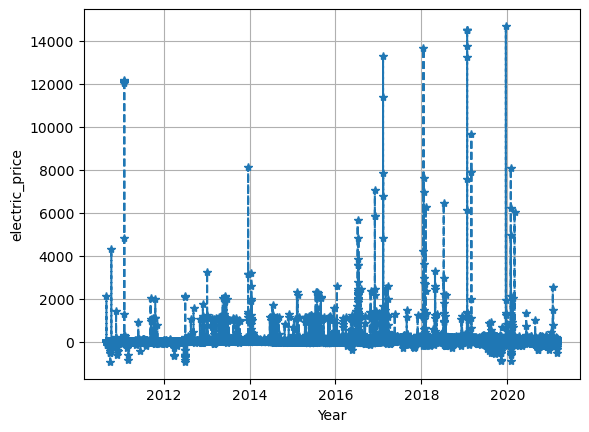

In [124]:
plt.grid()
plt.xlabel('Year')
plt.ylabel("electric_price")
plt.plot(df.ds, df.y,'--',marker='*')

In [145]:
forecast1["yhat"]

0       -15.042251
1        -7.570489
2        -4.789868
3        -8.295120
4       -13.333847
           ...    
2762     83.595758
2763    216.769404
2764     84.385318
2765     74.904581
2766     73.017317
Name: yhat, Length: 2767, dtype: float64

In [147]:
test

,ds,y
2757,2010-12-24 21:00:00,24.870
2758,2010-12-24 22:00:00,22.820
2759,2010-12-24 23:00:00,21.185
2760,2010-12-25 00:00:00,20.120
2761,2010-12-25 01:00:00,18.065
...,...,...
5509,2011-04-18 13:00:00,29.830
5510,2011-04-18 14:00:00,30.665
5511,2011-04-18 15:00:00,30.680
5512,2011-04-18 16:00:00,30.985


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      92016 non-null  datetime64[ns]
 1   y       92016 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 MB


In [138]:
#MAPE.
mape

NameError: name 'mape' is not defined